# Descriptive Analyses

## Preparation

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# load data
data = pd.read_csv("dissertation_dataset.csv")

# adjust variables to match analyses later
data['log_homicide'] = np.log1p(data['homicide_ratio'])
data['gdp_lag'] = data.groupby('country')['gdp'].shift(1)

# drop generated NA
data = data.dropna(subset=['log_homicide', 'hdi', 'wgi', 'gdp_lag', 'infant_mort', 'unemployment'])                   

## Basic descriptives

In [6]:
# check dataset structure
print("=== Dataset Structure ===")
print(f"Total rows: {len(data)}")
print(f"Columns ({len(data.columns)}):\n{data.columns.tolist()}")
print("\nCountry count:", data['country'].nunique())

=== Dataset Structure ===
Total rows: 2911
Columns (14):
['year', 'country', 'code', 'region', 'homicide_index', 'homicide_ratio', 'hdi', 'hdi_class', 'gdp', 'infant_mort', 'unemployment', 'wgi', 'log_homicide', 'gdp_lag']

Country count: 146


In [7]:
# descriptives table
desc_vars = ['log_homicide', 'hdi', 'wgi', 'gdp_lag', 'infant_mort', 'unemployment']
desc_table = data[desc_vars].describe().T

print(desc_table.round(2))

               count          mean           std          min           25%  \
log_homicide  2911.0  1.640000e+00  1.020000e+00         0.00  8.000000e-01   
hdi           2911.0  7.500000e-01  1.300000e-01         0.32  6.700000e-01   
wgi           2911.0  2.600000e-01  8.800000e-01        -1.93 -4.300000e-01   
gdp_lag       2911.0  4.637181e+11  1.712062e+12  28477158.10  1.192974e+10   
infant_mort   2911.0  1.792000e+01  1.799000e+01         1.50  5.050000e+00   
unemployment  2911.0  8.040000e+00  5.340000e+00         0.10  4.490000e+00   

                       50%           75%           max  
log_homicide  1.350000e+00  2.350000e+00  4.730000e+00  
hdi           7.600000e-01  8.500000e-01  9.700000e-01  
wgi           1.400000e-01  9.300000e-01  2.010000e+00  
gdp_lag       4.990167e+10  2.332268e+11  2.091785e+13  
infant_mort   1.240000e+01  2.260000e+01  1.243000e+02  
unemployment  6.900000e+00  1.027000e+01  3.716000e+01  


In [8]:
desc_table.round(2).to_csv("descriptive_table.csv")

In [9]:
# correlation table
corr_vars = ['log_homicide', 'hdi', 'wgi', 'gdp', 'infant_mort', 'unemployment']

corr_table = data[desc_vars].corr().round(2)

print(corr_table.to_string())

corr_table.round(2).to_csv("correlation_table.csv")

              log_homicide   hdi   wgi  gdp_lag  infant_mort  unemployment
log_homicide          1.00 -0.42 -0.38    -0.09         0.30          0.14
hdi                  -0.42  1.00  0.75     0.21        -0.88         -0.05
wgi                  -0.38  0.75  1.00     0.18        -0.59         -0.05
gdp_lag              -0.09  0.21  0.18     1.00        -0.14         -0.06
infant_mort           0.30 -0.88 -0.59    -0.14         1.00         -0.00
unemployment          0.14 -0.05 -0.05    -0.06        -0.00          1.00


In [10]:
# standardized VIF table

# define X variables
X_raw = data[['hdi', 'wgi', 'gdp_lag', 'infant_mort', 'unemployment']]

# standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# put back into dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X_raw.columns)

# vif
vif_df = pd.DataFrame()
vif_df['variable'] = X_scaled_df.columns
vif_df['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print(vif_df)
vif_df.round(2).to_csv("vif_table.csv")

       variable       VIF
0           hdi  7.267018
1           wgi  2.407617
2       gdp_lag  1.056889
3   infant_mort  4.859501
4  unemployment  1.013667


## Visualizations

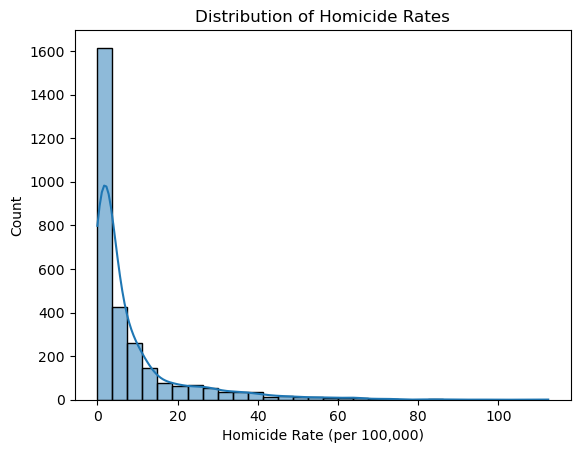

In [12]:
# histogram homicides - justification for log homicides
sns.histplot(data["homicide_ratio"], bins=30, kde=True)
plt.title("Distribution of Homicide Rates")
plt.xlabel("Homicide Rate (per 100,000)")
plt.show()

Text(0.5, 1.0, 'Homicide Rates by Region')

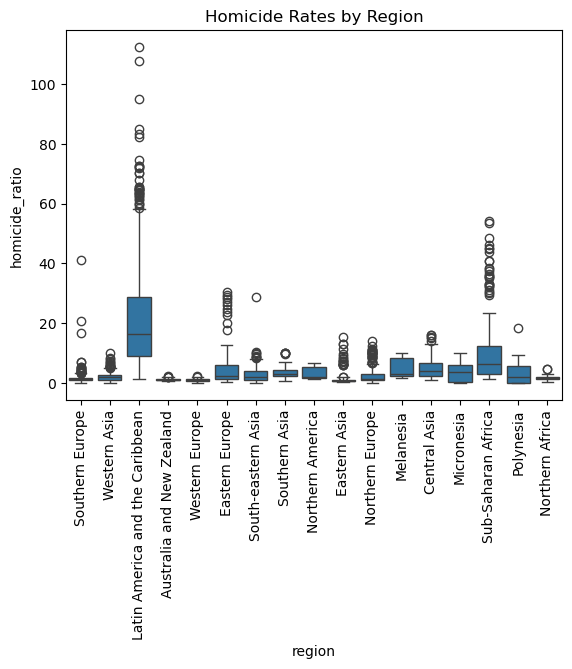

In [13]:
# boxplot homicide per region - reinforcing histogram but also more info
sns.boxplot(data=data, x="region", y="homicide_ratio")
plt.xticks(rotation=90)
plt.title("Homicide Rates by Region")

Text(0, 0.5, 'Avg Homicide Rate')

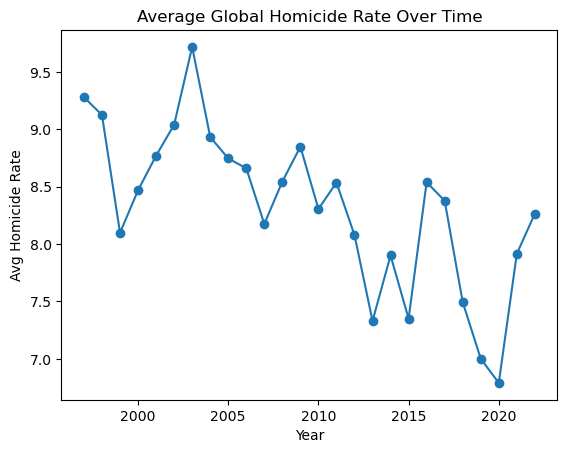

In [14]:
# line graph homicide over time
data_reset = data.reset_index()
avg_homicide_by_year = data_reset.groupby("year")["homicide_ratio"].mean()

avg_homicide_by_year.plot(marker='o')
plt.title("Average Global Homicide Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Homicide Rate")